In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [37]:
# 1. CSV 파일에서 유동인구 데이터 및 도로링크 데이터를 읽어옵니다.
population_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/서울시10m도로구간별추정유동인구데이터(여의동10월).csv')
road_link_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/10m도로링크.csv')

In [38]:
population_data.head()

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO
0,201510,121646,11560,11560540,1,0,0,64
1,201510,121646,11560,11560540,1,0,1,0
2,201510,121646,11560,11560540,1,0,2,11
3,201510,121646,11560,11560540,1,0,3,15
4,201510,121646,11560,11560540,1,0,4,18


In [39]:
road_link_data.head()

,RD_LINK_ID,ROAD_CD,STDR_YM_CD,SHAPE_FRM_INFO
0,1,411503000001,201506,NaN
1,10,113204127191,201506,NaN
2,100,113204127197,201506,NaN
3,1000,113504130138,201506,NaN
4,10000,113054124576,201506,NaN


In [45]:
# 'STDR_YM_CD' 값이 201510인 데이터 필터링
filtered_population_data = population_data[
    (population_data['STDR_YM_CD'] == 201510) &
    (population_data['DAYWEEK_CD'] == 1) &
    (population_data['AGRDE_CD'] == 30) &
    (population_data['TMZON_CD'] == 5)
    ] 

filtered_population_data

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO
26,201510,121646,11560,11560540,1,30,5,6
124,201510,121887,11560,11560540,1,30,5,62
222,201510,122452,11560,11560540,1,30,5,58
320,201510,122566,11560,11560540,1,30,5,78
418,201510,122807,11560,11560540,1,30,5,83
...,...,...,...,...,...,...,...,...
17666,201510,131596,11560,11560540,1,30,5,18
17764,201510,131603,11560,11560540,1,30,5,9
17862,201510,131607,11560,11560540,1,30,5,15
17960,201510,132336,11560,11560540,1,30,5,7


In [16]:
# 2. shp 파일 로드
road_shape_data = gpd.read_file('/Volumes/T7 Shield/응용통계학과/3학년 2학기/공모전/2023 서울시 빅데이터캠퍼스 공모전/Recent_Resource/seoul_feat/NGII_CDM_도로경계/N3L_A0010000.shp')

In [17]:
# 데이터의 처음 몇 행 및 공간 정보를 확인
road_shape_data.head(), road_shape_data.geometry.iloc[0]

(                                 UFID      SCLS       FMTA  \
 0  1000035715049A00110000000000000001  A0013118  R16010001   
 1  1000035715049A00110000000000000002  A0013118  R16010001   
 2  1000035715049A00110000000000000003  A0013118  R16010001   
 3  1000035715049A00110000000000000004  A0013118  R16010001   
 4  1000035715048A00110000000000000005  A0013118  R16010001   
 
                                             geometry  
 0  LINESTRING (1018385.186 1682660.628, 1018385.7...  
 1  LINESTRING (1018372.537 1682661.233, 1018373.5...  
 2  LINESTRING (1018380.755 1682656.692, 1018381.9...  
 3  LINESTRING (1018369.509 1682656.294, 1018368.5...  
 4  LINESTRING (1017121.357 1681866.733, 1017123.9...  ,
 <LINESTRING (1.02e+06 1.68e+06, 1.02e+06 1.68e+06)>)

/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

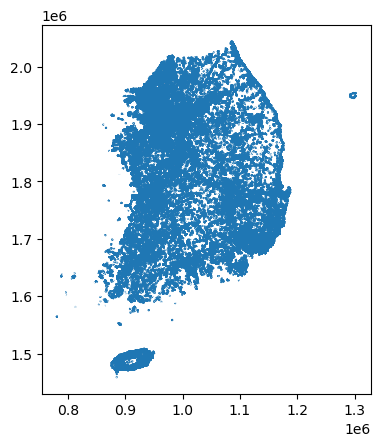

In [46]:
road_shape_data.plot()

In [18]:
# 3. 도로 라인을 10m 간격의 포인트로 변환합니다.
from shapely.geometry import Point

def line_to_points(linestring, interval=10):
    """라인을 주어진 간격의 포인트로 변환하는 함수"""
    points = []
    length = linestring.length
    num_points = int(length / interval) + 1
    for i in range(num_points):
        point = linestring.interpolate(i * interval)
        points.append(Point(point.x, point.y))
    return points

In [19]:
import numpy as np
from shapely.geometry import Point, LineString

# 도로 라인을 10m 간격의 포인트로 변환하는 함수
def line_to_points(linestring, interval=10):
    length = linestring.length
    return [linestring.interpolate(distance) for distance in np.arange(0, length, interval)]

In [20]:
# 가상의 도로 데이터 기반으로 10m 간격의 포인트를 생성
sample_road = LineString([(1018385.186, 1682660.628), (1018385.7, 1682660.5)])
all_points = line_to_points(sample_road)

all_points

[<POINT (1.02e+06 1.68e+06)>]

In [22]:
# 가상의 도로 데이터와 유동인구 데이터를 기반으로 유동인구 할당
# (실제 데이터 연결은 제공된 데이터에 따라 다를 수 있습니다.)
# 가상의 도로 데이터와 유동인구 데이터를 기반으로 유동인구 할당
sample_road_id = "1000035715049A00110000000000000001"
sample_population = population_data[population_data["RD_LINK_ID"] == sample_road_id].FLPOP_CO.sum()

sample_population

0

In [9]:
# 4. 각 10m 포인트에 유동인구 데이터를 할당합니다.
# 유동인구 데이터와 도로링크 데이터의 형식에 따라 할당 로직을 작성합니다.
for idx, row in gdf.iterrows():
    road_id = row['road_id']  # 이 부분은 실제 도로 ID 컬럼에 맞게 수정해야 합니다.
    population = population_data[population_data['road_id'] == road_id]['population'].values[0]
    for point in row['points']:
        # 포인트별로 할당할 유동인구 데이터를 계산합니다. (예: 도로의 전체 인구 / 포인트 수)
        point_population = population / len(row['points'])


KeyError: 'road_id'

In [ ]:
# 5. 추정된 포인트를 다시 라인으로 변환하여 화면에 표출합니다.
gdf['geometry'] = gdf['points'].apply(LineString)
gdf.plot()